<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/03_1_SVD_Blunt_Body.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

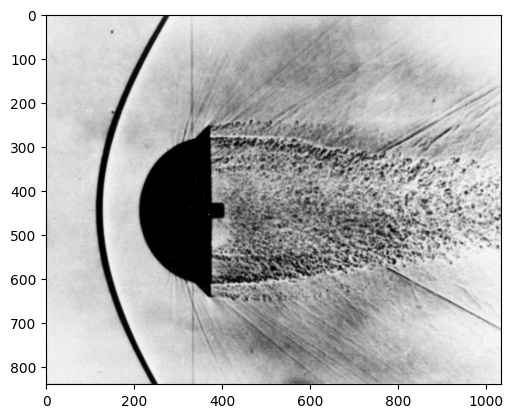

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from urllib.request import urlopen

# get the image from the url
#url = "https://upload.wikimedia.org/wikipedia/commons/f/fb/Karmansche_Wirbelstr_kleine_Re.JPG"
#url = "https://upload.wikimedia.org/wikipedia/commons/2/2c/Vortex-street-1.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/6/61/Black_Circle.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/3/33/Bowshock_example_-_blunt_body.jpg"

image = Image.open(urlopen(url))

# convert the image to grayscale
image = image.convert('L')

# convert the image to a numpy array
X = np.array(image)

# plot the image
plt.imshow(X, cmap='gray')
plt.show()


In [14]:
print("Dimension of X :", X.ndim)
print("Shape of X     :", X.shape)
print("Size of X      :", X.size)
print("Min(X)         :", np.min(X))
print("Max(X)         :", np.max(X))
print("X.             :\n",X)

Dimension of X : 2
Shape of X     : (840, 1035)
Size of X      : 869400
Min(X)         : 0
Max(X)         : 243
X.             :
 [[225 221 223 ... 223 219 216]
 [221 219 222 ... 222 219 216]
 [218 215 219 ... 218 216 216]
 ...
 [231 226 220 ... 226 224 223]
 [232 227 221 ... 229 229 229]
 [233 228 222 ... 232 234 235]]


Shape of U     : (840, 840)
Shape of S     : (840,)
Shape of VT    : (840, 1035)
np.diag(S)     : (840, 840)
--------------r: 5
Shape of U     : (840, 5)
Shape of S     : (5, 5)
Shape of VT    : (5, 1035)
Shape of Xaprx : (840, 1035)


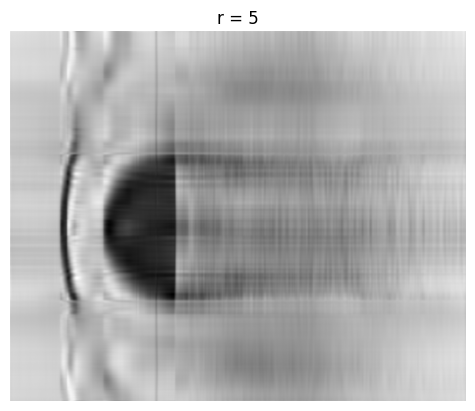

--------------r: 20
Shape of U     : (840, 20)
Shape of S     : (20, 20)
Shape of VT    : (20, 1035)
Shape of Xaprx : (840, 1035)


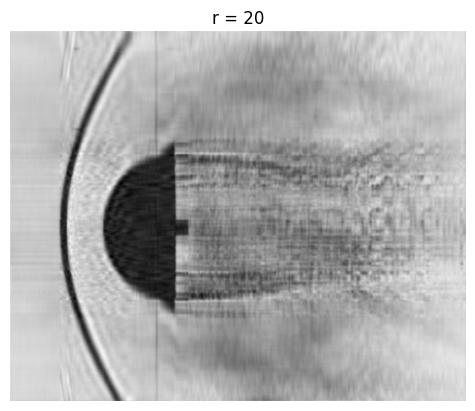

--------------r: 100
Shape of U     : (840, 100)
Shape of S     : (100, 100)
Shape of VT    : (100, 1035)
Shape of Xaprx : (840, 1035)


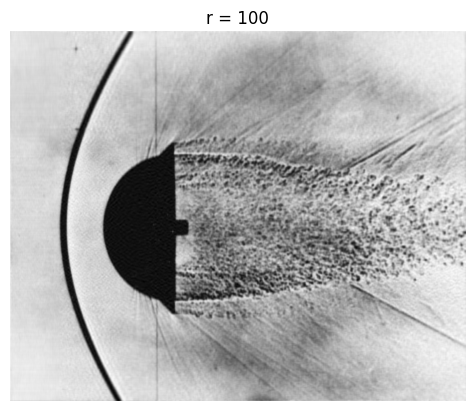

--------------r: 200
Shape of U     : (840, 200)
Shape of S     : (200, 200)
Shape of VT    : (200, 1035)
Shape of Xaprx : (840, 1035)


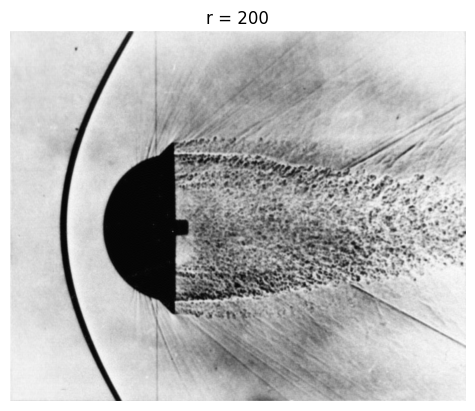

In [20]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
print("Shape of U     :", U.shape)
print("Shape of S     :", S.shape)
print("Shape of VT    :", VT.shape)

S = np.diag(S)
print("np.diag(S)     :", S.shape)

j = 0
for r in (5, 20, 100, 200):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    print("--------------r:",r)
    print("Shape of U     :", U[:,:r].shape)
    print("Shape of S     :", S[0:r,:r].shape)
    print("Shape of VT    :", VT[:r,:].shape)
    print("Shape of Xaprx :", Xapprox.shape)

    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [21]:
print("Matrix U")
print("Dimension :", U.ndim)
print("Shape     :", U.shape)
print("Size      :", U.size)

Matrix U
Dimension : 2
Shape     : (840, 840)
Size      : 705600


([], [])

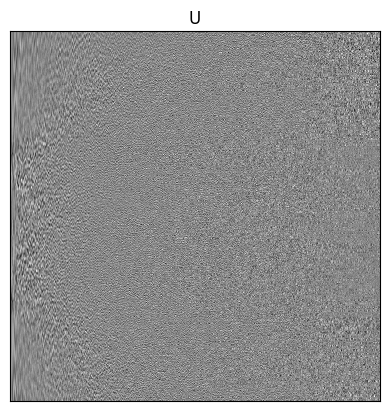

In [22]:
# U
plt.imshow(U, cmap='gray_r', interpolation='nearest')
plt.title('U')
plt.xticks([])
plt.yticks([])

In [23]:
print("Matrix S")
print("Dimension :", S.ndim)
print("Shape     :", S.shape)
print("Size      :", S.size)

Matrix S
Dimension : 2
Shape     : (840, 840)
Size      : 705600


In [24]:
print("First 4x4 part of the S:\n", S[:4,:4])

First 4x4 part of the S:
 [[156599.50239577      0.              0.              0.        ]
 [     0.          27384.1862194       0.              0.        ]
 [     0.              0.          14116.948045        0.        ]
 [     0.              0.              0.           8868.86328219]]


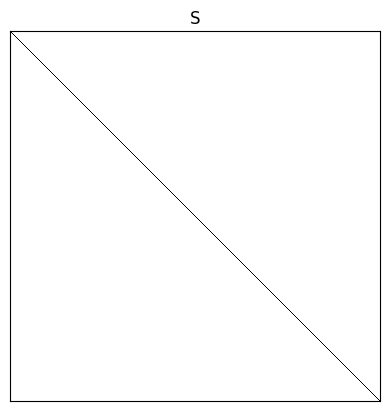

In [25]:
# S
plt.imshow(S, cmap='gray_r', interpolation='nearest')
plt.title('S')
plt.clim(0,1)  # Set the color limits to make 0s white and non-zeros black
plt.xticks([])
plt.yticks([])
#plt.box(False)
plt.show()

In [26]:
print("Matrix VT")
print("Dimension :", VT.ndim)
print("Shape     :", VT.shape)
print("Size      :", VT.size)

Matrix VT
Dimension : 2
Shape     : (840, 1035)
Size      : 869400


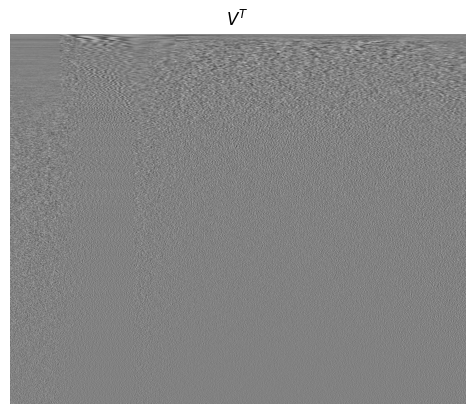

In [27]:
# VT
plt.figure(1)
img = plt.imshow(VT)
img.set_cmap('gray')
plt.axis('off')
plt.title('$V^T$')
plt.show()

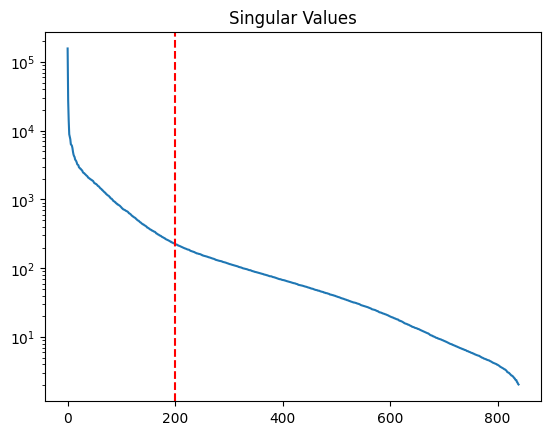

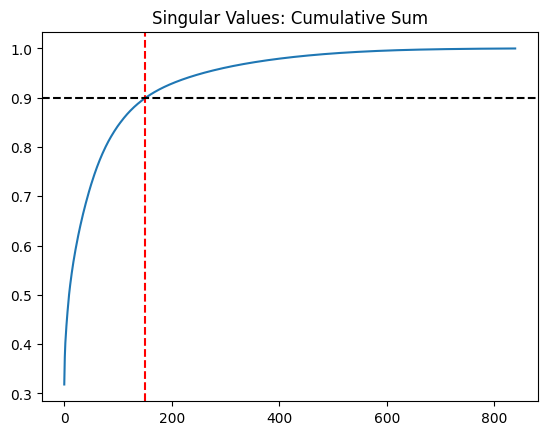

In [32]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.axvline(200, color='red',linestyle='dashed')
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.axvline(150, color='red',linestyle='dashed')
plt.axhline(0.90, color='black',linestyle='dashed')
plt.title('Singular Values: Cumulative Sum')
plt.show()

Shape of X XT (840, 840)


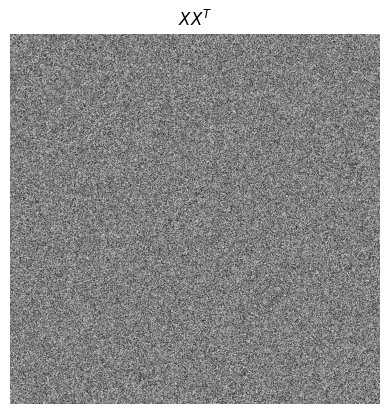

In [33]:
# Correlation Matrices, X Xt
# Xt = Transpose of X
Xt = X.T
# XXt = X dot XT
XXt = X @ Xt
print("Shape of X XT", XXt.shape)
plt.figure(1)
img = plt.imshow(XXt)
img.set_cmap('gray')
plt.axis('off')
plt.title('$X X^T$')
plt.show()

Shape of XT X (1035, 1035)


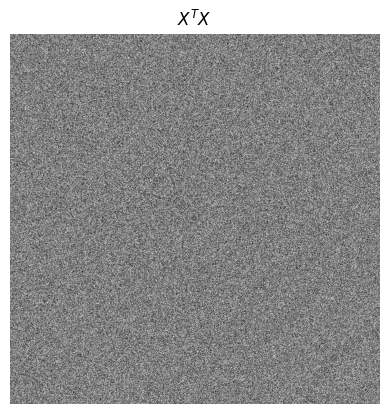

In [34]:
# Correlation Matrices, Xt X
# Xt = Transpose of X
Xt = X.T
# XXt = X dot XT
XtX = Xt @ X
print("Shape of XT X", XtX.shape)
plt.figure(1)
img = plt.imshow(XtX)
img.set_cmap('gray')
plt.axis('off')
plt.title('$X^T X$')
plt.show()